In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("Lab_6_matrices_kinematics.ipynb")

# Using matrices to position parts of a robot arm

The goal of this part of the assignment is to use matrices to position a robot arm in space. In the lab we'll just
position each component independently and rotate them by angles. In the homework we'll pose all of the links.


Slides: https://docs.google.com/presentation/d/1Ut5RnIKU8DF8k_joGXp4tJ1FzBKNIX8JYRE9wkIP_qE/edit?

Moving from the lecture activity to the lab:
- Each component of the arm is stored as an instance of a class (sort of a glorified dictionary). These will be put into a list in the homework
- The points for the objects are stored in the class - check out the __init__ routine in arm_component.py  
- The class stores the points, the matrix_shape_X and matrix_pose_X matrices from the lecture activity, and some additional stuff (name, color, lengths, angles)
- The plot routine in ArmComponent.py can plot either JUST the shaped points or the shaped points moved by the pose matrix

## More info

Use a matrix to take two basic shapes (a square and a wedge) and re-shape them into the geometry for the arm, gripper.

Yes, you could just create these basic shapes with the "correct" XYs, but we'll use a matrix to transform the
basic shape (square, wedge) to the correct size and shape. This way, we only have to make a square and a wedge and then just use matrices to shape them.

This is actually what most packages (eg, solidworks) do when you make a model. Each part of the model is defined in a "canonical" location, then transformed to the desired position/scale/rotation using a matarix. This is
 *before* calculating the matrix that positions the part based on the, eg, joint angles

For all of the shaping, you should be creating a matrix that consists of a scale followed by a rotate (maybe) followed by a translate

See slides for what the resulting re-positioned shapes look like; there is a plot function for each to check, as well as a numerical check on the matrix. You can do these checks here OR do them directly in arm_components.py

Note that the TODOs in arm_components are also labeled with a STEP 1 etc so you can find them easier

TODO step 1: Copy your code to make the square points into **points_in_a_square** in **arm_component.py** (the wedge is done for you).

TODO step 2: Edit **matrix_shape_base, matrix_shape_link, matrix_shape_palm, and matrix_shape_finger**. Don't forget to edit the methods to return the matrices

TODO step 3: Edit **matrix_shape_base, matrix_shape_link, matrix_shape_palm, and matrix_shape_finger**. Don't forget to edit the methods to return the matrices

TODO step 4: Check that you can set a pose matrix for each shape

These functions do the equivalent of what we did with **mmatrix_shape_** in the lecture activity.

In [2]:
# The usual imports
import numpy as np
import matplotlib.pyplot as plt

# These are the routines used in the lecture activity - we'll re-use them here
import matrix_routines as mt

# Print all matrices/floating point data with 4 decimal places
np.set_printoptions(formatter={'float': lambda x: "{0:0.4f}".format(x)})


In [3]:
# This is the class you'll edit for the lab. You can edit (and check) them in the.py by executing arm_component.py OR write
#  the code here (with checks) then copy the code into the .py file
from arm_component import ArmComponent

In [4]:
# These commands will force JN to actually re-load the external file when you re-execute the import command
%load_ext autoreload
%autoreload 2

## Step 1: points in a square

TODO: Take the code you wrote in lecture activity to make a square and put it in the **points_in_a_square** method in **arm_components.py**. See **points_in_a_wedge** in the same file to see what this looks like

In [5]:
# Once you've copied your code over, and re-run the import line above and this should work
#   NOTE: Doing Run all will also do the import again and will save you scrolling up and down

pts_in_a_square = ArmComponent.points_in_a_square()

In [6]:
grader.check("square_points")

square_points results: All test cases passed!

## Step 2: __init__ and get_XX methods

In this step you're just going to set up the **__init__** and **get_** methods in the class so they initialize variables correctly (and return the matrices you created using a method).

Some likely things to go wrong: Don't forget that all variables that you want to "keep" in the class should have self. in front of them (this tells Python that the variable belongs to the class and should be kept)

Make sure to initialize your matrices to be the identity

In [7]:
# Don't forget to re-import arm_component.py if you changed it
from arm_component import ArmComponent

# Step 2: Check that variable names created correctly and get_* methods correct
arm_component_blank = ArmComponent("check_name", "Grey", shape_to_use="wedge")

assert arm_component_blank.name == "check_name"
assert arm_component_blank.color == "Grey"
\
# Check that returning a 3x3 identity matrix
mat_shape = arm_component_blank.get_shape_matrix()
mat_pose = arm_component_blank.get_pose_matrix()

assert np.all(np.isclose(mat_shape, np.identity(3)))
assert np.all(np.isclose(mat_pose, np.identity(3)))


In [8]:
# I set up a convert-the-class-to-a-string method for you, which you can use to print out the class in a sort-of readable form
print(arm_component_blank)

Class name: check_name, color: Grey, shape: wedge
Key: pts, Value:
[[-1.000000 1.000000 0.800000 -0.800000 -1.000000]
 [-1.000000 -1.000000 1.000000 1.000000 -1.000000]
 [1.000000 1.000000 1.000000 1.000000 1.000000]]
Key: shape_matrix, Value:
[[1.000000 0.000000 0.000000]
 [0.000000 1.000000 0.000000]
 [0.000000 0.000000 1.000000]]
Key: pose_matrix, Value:
[[1.000000 0.000000 0.000000]
 [0.000000 1.000000 0.000000]
 [0.000000 0.000000 1.000000]]



In [9]:
grader.check("init_method")

init_method results: All test cases passed!

## Step 3a: Shape the base

See **matrix_shape_base** for specifics on how to shape the base; I've set this up so you can first create the matrix here (and check the result) then copy it over to the class.

In [10]:
# The size of the base 
base_width = 1.0
base_height = 0.5

# SCRATCH code - make the matrix here that shapes the base (a scale followed by a translate)
# mat_my_base = np.identity(3)
# mat_my_base[0, 0] = base_width/2
# mat_my_base[1, 2] = base_height/2
# mat_my_base[1, 1] = base_height/2

mat_my_base = np.identity(3)

S = mt.make_scale_matrix(base_width/2, base_height/2)
T = mt.make_translation_matrix(0, base_height/2)

mat_my_base = T @ S

# TEST - with the above width/height, this is the matrix you should get out. Do NOT just set your matrix
#  to this one - we will be changing base sizes later
mat_base_check = np.array([[0.5, 0.0, 0], [0.0, 0.25, 0.25], [0.0, 0.0, 1.0]])

# Once this passes, copy the code into matrix_shape_base in arm component
assert np.all(np.isclose(mat_my_base, mat_base_check))

In [11]:
# This checks that you copied the code over correctly - don't forget to run all or re-do the import after you save arm_components.py
from arm_component import ArmComponent
arm_component_base = ArmComponent(name="Base", color="black", shape_to_use="wedge")
arm_component_base.matrix_shape_base(base_width=base_width, base_height=base_height)

# If the matrix in the previous cell is correct, but this does not pass, check the following:
#   Is mat_my_base_check the identity()? Then you probably did not save the matrix by doing a
#      self.[your matrix name] = [calculated matrix]
#   OR you miss-spelled the name - should be the same as the one in get_shape_matrix
mat_my_base_check = arm_component_base.get_shape_matrix()
assert np.all(np.isclose(arm_component_base.get_shape_matrix(), mat_base_check))

# Note: If the autograder below does not bass, it's probably because you hard-wired the width/height

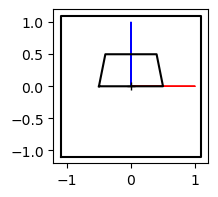

In [12]:
# Plot the result - see slides
# Draw the base in the plot window - see slides for correct answer
fig, axs = plt.subplots(1, 1, figsize=(2, 2))

# A framing window
mt.plot_axes_and_big_box(axs, box_size=1.1)
arm_component_base.plot(axs)

In [13]:
grader.check("shape_base")

shape_base results: All test cases passed!

## Step 3b: Shape the link(s)

The same code will be used for all the link shapes, btw - this just tests with one size.

Again, there's "scratch" code to test your matrix works. Feel free to delete the SCRATCH TEST if you want to jump straight to putting the code in the class

In [14]:
# The size of the link 
link1_length = 0.5
link1_width = 0.25

# SCRATCH code - make the matrix here that shapes the base (a scale followed by a translate)
mat_my_link1 = np.identity(3)

S = mt.make_scale_matrix(link1_length/2, link1_width/2)
T = mt.make_translation_matrix(link1_length/2, 0)

mat_my_link1 = T @ S

# TEST - with the above width/height, this is the matrix you should get out. Do NOT just set your matrix
#  to this one - we will be changing link sizes later
mat_link1_check = np.array([[0.25, 0.0, 0.25], [0.0, 0.125, 0.0], [0.0, 0.0, 1.0]])

# Once this passes, copy the code into matrix_shape_link in arm component
#   OR just put the code straight in and uncomment this
assert np.all(np.isclose(mat_my_link1, mat_link1_check))

In [15]:
# This checks that you copied the code over correctly - don't forget to run all or re-do the import after you save arm_components.py
arm_component_link1 = ArmComponent(name="Link1", color="blue", shape_to_use="square")
arm_component_link1.matrix_shape_link(link_length=link1_length, link_width=link1_width)

# See matrix base if this does not work for debugging tips
assert np.all(np.isclose(arm_component_link1.get_shape_matrix(), mat_link1_check))

# Note: If the autograder below does not bass, it's probably because you hard-wired the width/length

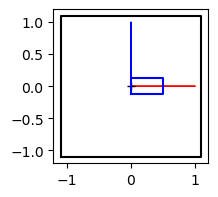

In [16]:
# Plot the result - see slides
# Draw the link in the plot window - see slides for correct answer
fig, axs = plt.subplots(1, 1, figsize=(2, 2))

# A framing window
mt.plot_axes_and_big_box(axs, box_size=1.1)
arm_component_link1.plot(axs)

In [17]:
grader.check("link_shape")

link_shape results: All test cases passed!

## Step 3c: Gripper (fingers plus palm)

The "gripper" is put together from three pieces - the palm, and two fingers. You will need to edit both **matrix_shape_palm** and **matrix_shape_fingers**

In [18]:
# The sizes for all of the components
palm_width = 0.1
finger_length = 0.075
finger_width = 0.025


In [19]:
# SCRATCH CELL - if need be, you can write the code here then check it against the answers given in the next cell


In [20]:
# Create the three components
arm_component_palm = ArmComponent(name="Palm", color="tomato", shape_to_use="square")
arm_component_finger_top = ArmComponent(name="Finger top", color="green", shape_to_use="wedge")
arm_component_finger_bot = ArmComponent(name="Finger bot", color="green", shape_to_use="wedge")

# Set the shape matrix
arm_component_palm.matrix_shape_palm(palm_width=palm_width)
arm_component_finger_top.matrix_shape_finger(palm_width=palm_width, finger_length=finger_length, finger_width=finger_width, b_is_top=True)
arm_component_finger_bot.matrix_shape_finger(palm_width=palm_width, finger_length=finger_length, finger_width=finger_width, b_is_top=False)

# Check matrices
mat_palm_check = np.array([[0.005, 0.0, 0.0], [0.0, 0.05, 0.0], [0.0, 0.0, 1.0]])
mat_finger_top_check = np.array([[0.0, 0.0375, 0.0375], [-0.0125, 0.0, 0.05], [0.0, 0.0, 1.0]])
mat_finger_bot_check = np.array([[0.0, 0.0375, 0.0375], [-0.0125, 0.0, -0.05], [0.0, 0.0, 1.0]])

# Feel free to add asserts here

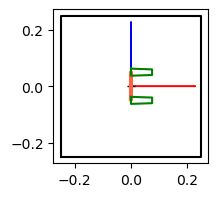

In [21]:
# Plot the result - see slides
# Draw the gripper in the plot window - see slides for correct answer
fig, axs = plt.subplots(1, 1, figsize=(2, 2))

# A framing window
mt.plot_axes_and_big_box(axs, box_size=0.25)
arm_component_palm.plot(axs)
arm_component_finger_top.plot(axs)
arm_component_finger_bot.plot(axs)

In [22]:
grader.check("gripper_matrices")

gripper_matrices results: All test cases passed!

## Step 4: Rotate each component

TODO: Edit **set_pose_matrix** and **set_pose_rotation** so that it creates a matrix that rotates the component by the given amount. **set_pose_rotation** should call **set_pose_matrix** which set the pose matrix in the class. The plot routine will then use that matrix (by calling **get_pose_matrix**).

Some things that can go wrong: 
- if the code produces an error, the most likely error will be some version of "variable undefined". Read through the error to figure out where
- if your code does not produce an error, but doesn't rotate the shape either, then you are not setting your variable correctly (see the next two bullet items)
- if you do: your_pose_matrix_name = .. instead of self.your_pose_matrix_name then it won't save the pose matrix in the class
- the variable name you use in **set_pose_matrix** and **get_pose_matrix** must be the same (and should be the same as the one you used in the __init__ method). 

This is mostly a check that you have set up the pose matrix; in the homework this will be replaced with **set_pose_matrix**

In [23]:
# SCRATCH CELL
# Use this cell to call the rotation method on one component (say the link1 component) and then check the result.
#  I've given you check matrices for the shapes and for the fingers.

rot_amt = -np.pi/4
mat_pose_check = mt.make_rotation_matrix(rot_amt)

# Note - only accurate out to 4 decminal places
mat_pose_check_top_finger = np.array([[np.cos(rot_amt), -np.sin(rot_amt), -0.035355], [ np.sin(rot_amt), np.cos(rot_amt), 0.014645], [0, 0, 1]])
mat_pose_check_bot_finger = np.array([[np.cos(rot_amt),  np.sin(rot_amt), -0.035355], [-np.sin(rot_amt), np.cos(rot_amt), -0.014645], [0, 0, 1]])


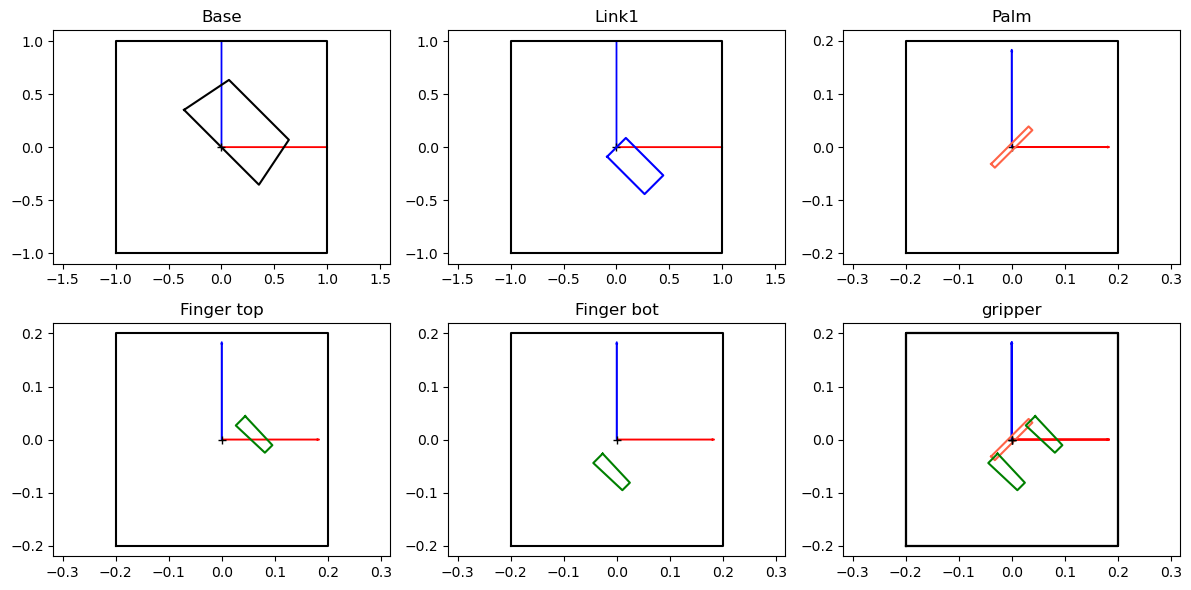

In [24]:

# TODO: Edit set_pose_rotation and set_pose_matrix in arm_components.py
# Yes, it's a little silly to call set_pose_matrix from set_pose_rotation, but in the homework you'll just be calling
#   set_pose_matrix, so this is partly to make sure that you set that up correctly
# The test rotates everything clockwise by pi over 4
#   Note: Rotating the fingers correctly is optional. 

fig, axs = plt.subplots(2, 3, figsize=(12, 6))

ncols = 3
box_sizes = [1.0, 1.0, 0.2, 0.2, 0.2]
for i, ac in enumerate((arm_component_base, arm_component_link1, arm_component_palm, arm_component_finger_top, arm_component_finger_bot)):
    irow = i // ncols
    icol = i % ncols

    mt.plot_axes_and_big_box(axs[irow, icol], box_size=box_sizes[i])
    # Set the rotation matrix on the arm component
    ac.set_pose_rotation(rot_amt)

    # Is your pose matrix a 3x3 rotation matrix?
    #   Note: Not checking that the rotation is correct - just that you're returning a 3x3 matrix...
    assert ac.get_pose_matrix().shape == (3, 3)

    # This will plot with both pose and shape matrix 
    ac.plot(axs[irow, icol], b_do_pose_matrix=True)
    axs[irow, icol].set_title(ac.name)

# Plot just the gripper components in the bottom right corner
for i, ac in enumerate((arm_component_palm, arm_component_finger_top, arm_component_finger_bot)):
    mt.plot_axes_and_big_box(axs[-1, -1], box_size=box_sizes[-1])

    # This will plot with both pose and shape matrix 
    ac.plot(axs[-1, -1], b_do_pose_matrix=True)

axs[-1, -1].set_title("gripper")
fig.tight_layout()


In [25]:
grader.check("rotate_pose_matrices")

rotate_pose_matrices results: All test cases passed!

## Extra credit check for fingers

If you have done the finger rotations the fancy way (rotating them at their bases), then this test will pass. 

In [26]:
grader.check("extra_credit_finger_rotations")

extra_credit_finger_rotations results:
    extra_credit_finger_rotations - 1 result:
        ❌ Test case failed
        Trying:
            assert np.all(np.isclose(arm_component_finger_top.get_pose_matrix(), mat_pose_check_top_finger, 0.001))
        Expecting nothing
        **********************************************************************
        Line 1, in extra_credit_finger_rotations 0
        Failed example:
            assert np.all(np.isclose(arm_component_finger_top.get_pose_matrix(), mat_pose_check_top_finger, 0.001))
        Exception raised:
            Traceback (most recent call last):
              File "c:\Users\Cody\anaconda3\Lib\doctest.py", line 1368, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest extra_credit_finger_rotations 0[0]>", line 1, in <module>
                assert np.all(np.isclose(arm_component_finger_top.get_pose_matrix(), mat_pose_check_top_finger, 0.001))
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
            AssertionError

    extra_credit_finger_rotations - 2 result:
        ❌ Test case failed
        Trying:
            assert np.all(np.isclose(arm_component_finger_bot.get_pose_matrix(), mat_pose_check_bot_finger, 0.001))
        Expecting nothing
        **********************************************************************
        Line 1, in extra_credit_finger_rotations 1
        Failed example:
            assert np.all(np.isclose(arm_component_finger_bot.get_pose_matrix(), mat_pose_check_bot_finger, 0.001))
        Exception raised:
            Traceback (most recent call last):
              File "c:\Users\Cody\anaconda3\Lib\doctest.py", line 1368, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest extra_credit_finger_rotations 1[0]>", line 1, in <module>
                assert np.all(np.isclose(arm_component_finger_bot.get_pose_matrix(), mat_pose_check_bot_finger, 0.001))
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
            AssertionError

## Hours and collaborators
Required for every assignment - fill out before you hand-in.

Listing names and websites helps you to document who you worked with and what internet help you received in the case of any plagiarism issues. You should list names of anyone (in class or not) who has substantially helped you with an assignment - or anyone you have *helped*. You do not need to list TAs.

Listing hours helps us track if the assignments are too long.

In [27]:

# List of names (creates a set)
worked_with_names = {"Luc Dale"}
# List of URLS I25 (creates a set)
websites = {"N/A"}
# Approximate number of hours, including lab/in-class time
hours = 7

In [28]:
grader.check("hours_collaborators")

hours_collaborators results: All test cases passed!

### To submit

Read me!!!   **Read me!!!**

- Submit this .ipynb file **AND** arm_routines.py. If you don't include arm_routines.py Gradescope cannot magically reach out to your computer and find your arm_routines.py file.
- We will supply matrix_routines.py for you (it won't break anything if you do include it)

If the Gradescope autograder fails, please check here first for common reasons for it to fail
    https://docs.google.com/presentation/d/1tYa5oycUiG4YhXUq5vHvPOpWJ4k_xUPp2rUNIL7Q9RI/edit?usp=sharing

Lots of people forget arm_routines.py. 